<a href="https://colab.research.google.com/github/BrianGisemba/MENTAL-HEALTH-TWEETS-CLASSIFICATION/blob/EDA/EDA_MentalHealthAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#reading the dataset
df=pd.read_csv("/content/MentalHealth (3).csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression


In [3]:
#checking the number of records
df.shape

(756, 13)

In [4]:
#checking the columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user', 'tweet', 'location',
       'description', 'friends_count', 'followers_count', 'statuses_count',
       'created_at', 'retweet_count', 'hashtags', 'disorder'],
      dtype='object')

In [5]:
# Checking the data types of the columns

df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
user               object
tweet              object
location           object
description        object
friends_count       int64
followers_count     int64
statuses_count      int64
created_at         object
retweet_count       int64
hashtags           object
disorder           object
dtype: object

In [6]:
# Changing the created_at column into time and date
df.created_at = pd.to_datetime(df.created_at)
df.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
user                       object
tweet                      object
location                   object
description                object
friends_count               int64
followers_count             int64
statuses_count              int64
created_at         datetime64[ns]
retweet_count               int64
hashtags                   object
disorder                   object
dtype: object

depression       353
anxiety          278
suicidal          59
bipolar           17
austim            14
schizophrenia     14
dementia          12
paranoia           9
Name: disorder, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


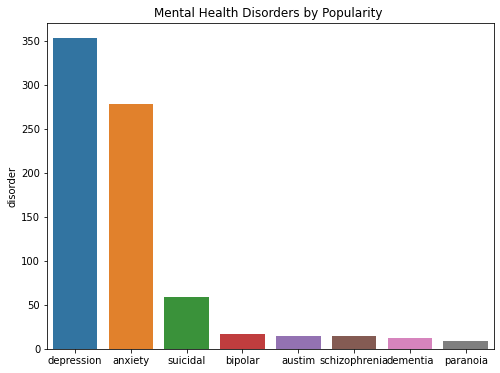

In [7]:
#creating a bar plot for the disoders
x=df['disorder'].value_counts()
print(x)
plt.figure(figsize = (8,6))
plt.title('Mental Health Disorders by Popularity ')
sns.barplot(x.index, x);

According to the hashtags the main mental health issues that kenyans are tweeting about are 
- Depression 
- Anxiety 
- Suicidal ideation 
- Bipolar
- Autism
- Schizophrenia
- Dementia 
- Paranoia 

In [8]:
df['hour'] = df['created_at'].dt.hour
df.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder,hour
0,0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression,10
1,1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression,10
2,2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression,9
3,3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression,8
4,4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression,8


In [9]:
# Checking the number of disorders per hour
df.hour.astype('category').value_counts()

7     70
8     70
9     52
17    51
13    48
11    43
12    41
19    41
10    40
18    39
16    38
14    35
6     29
5     29
15    28
21    23
20    21
4     18
3     13
22     9
2      6
23     5
1      4
0      3
Name: hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


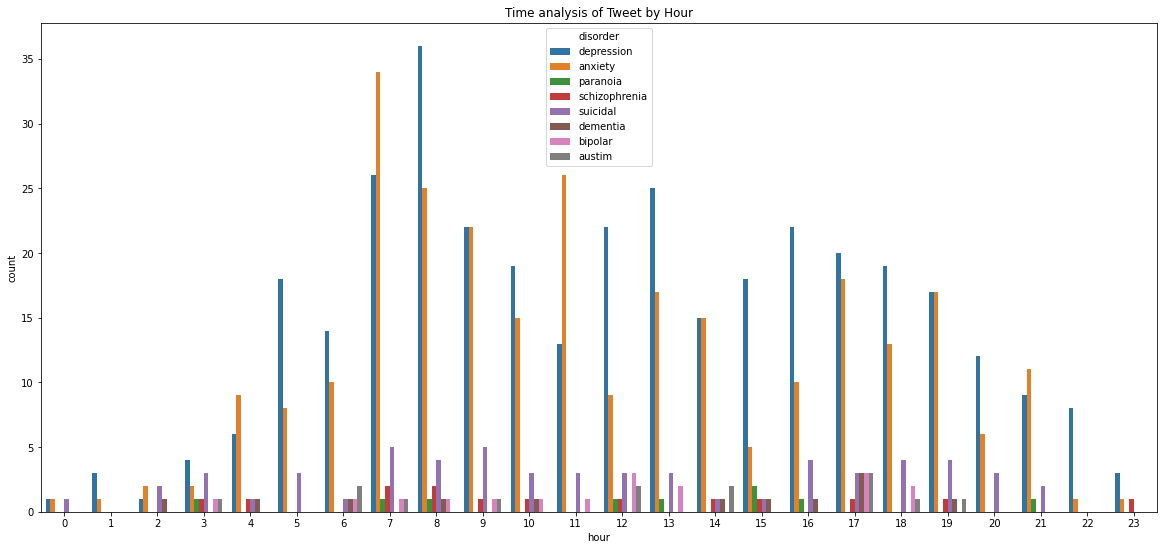

In [10]:
#graphical representation of tweet per hour according to each disorder
plt.figure(figsize = (20,9))
plt.title('Time analysis of Tweet by Hour')
x = df.hour

sns.countplot(df.hour.astype('category'), hue = df.disorder )
plt.show()

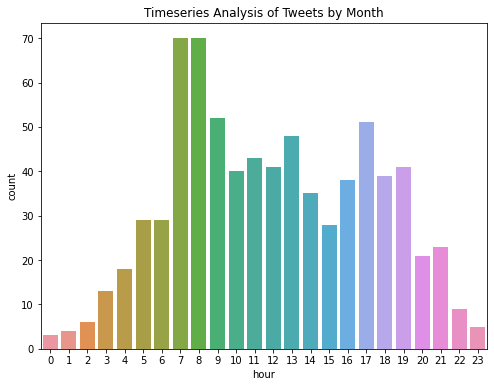

In [11]:
#graphical representation of tweet per hour
plt.figure(figsize=(8,6))
sns.countplot(x = df.hour)
plt.title('Timeseries Analysis of Tweets by Month')
plt.show()


In [12]:
#Tweeet per location
df.location.value_counts()

Nairobi, Kenya     415
Nairobi             69
Nairobi,Kenya       19
Nairobi Kenya       14
Nairobi             13
                  ... 
Kasarani, Kenya      1
eldoret              1
Nairobi, Kenya,      1
Maua, Kenya          1
Gilgil, Kenya        1
Name: location, Length: 129, dtype: int64

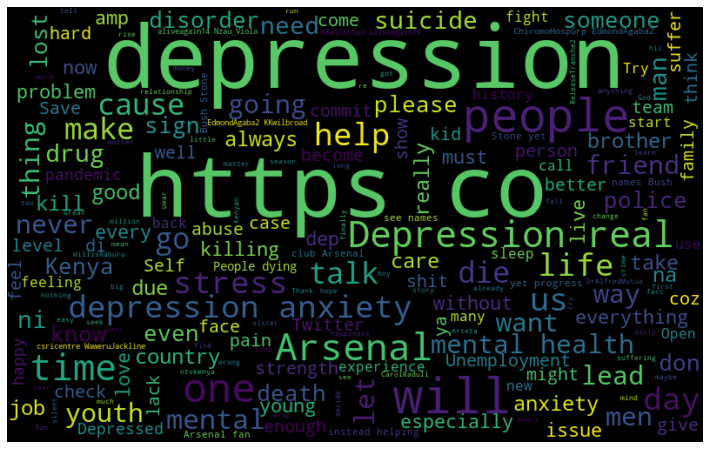

In [13]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the depression disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='depression'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

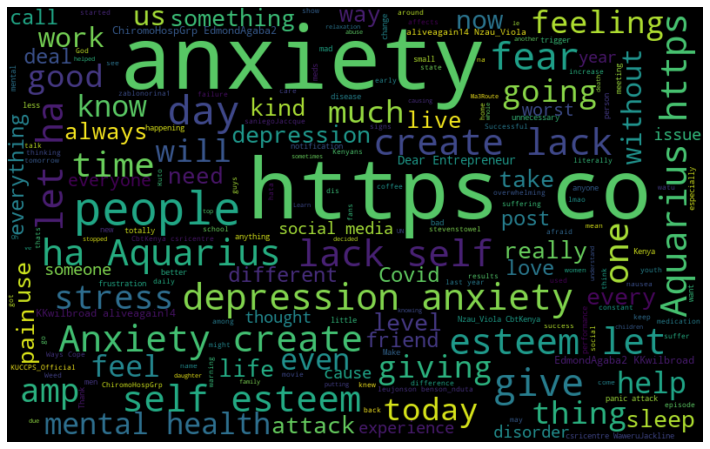

In [14]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the anxiety disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='anxiety'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

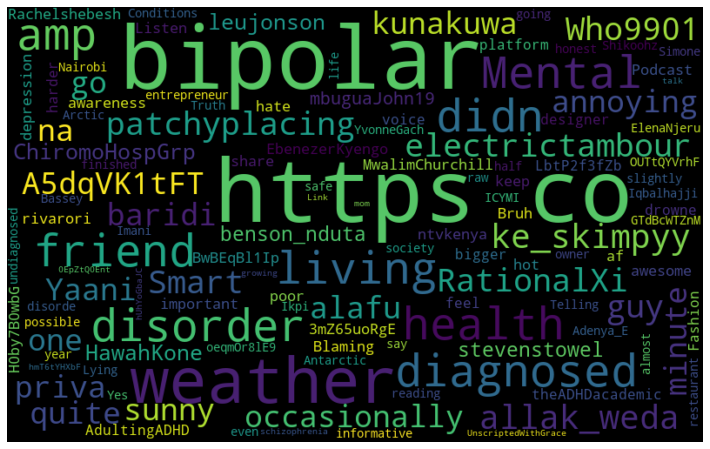

In [15]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the bipolar disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='bipolar'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

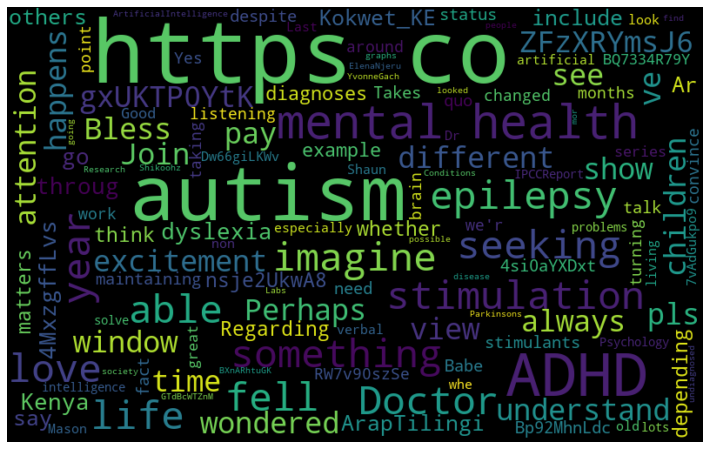

In [18]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the autism disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='austim'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

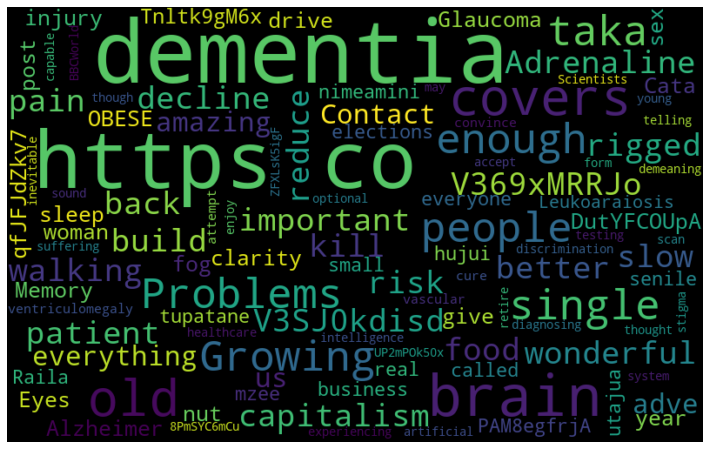

In [19]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the dementia disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='dementia'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

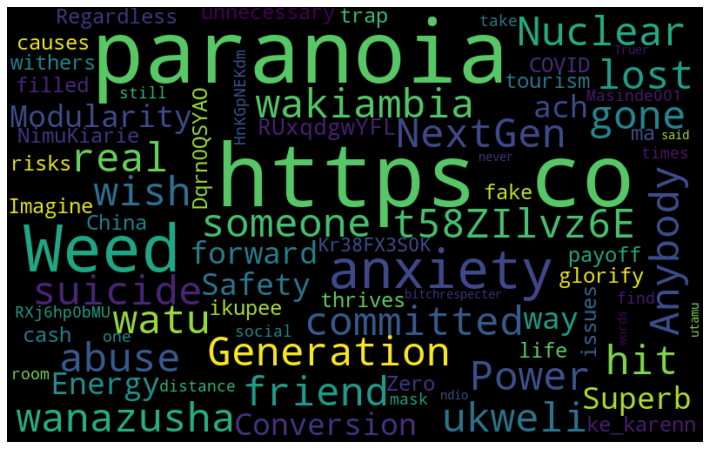

In [20]:
#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the paranoia disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='paranoia'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

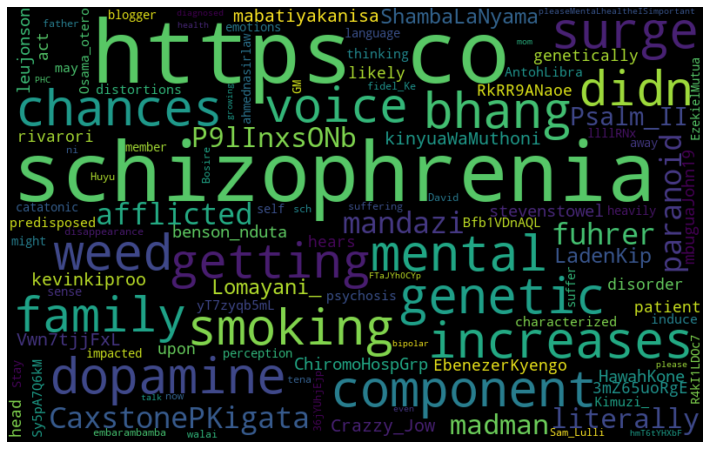

In [21]:

#Frequent words visulization for neutral words
from wordcloud import WordCloud
# visulize frequent words in the schizophrenia disorder
all_words= " ".join(sentence for sentence in df['tweet'][df['disorder']=='schizophrenia'])

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()